# Seaborn Tutorial

* **Goal**: Explore, visualize, analyze and fit models. <br>
* **Dataset**   : [Abalone](https://archive.ics.uci.edu/ml/datasets/abalone) <br>
* **Source**    : [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/) <br>
* **Libraries** : numpy, pandas, seaborn, matplotlib <br>
* **Summary**   : This notebook will be used to show some common series of steps followed for fitting linear regresssion models on a dataset. Specifically Exploration, visualization, and analysis of this visualizations will be a key goal of this notebook
* **Author**    : [Vijay Daultani](https://vijaydaultani.github.io)
* **Reference** : [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)

<hr>

# Outline

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Data Description](#data-description)
- [Part One - Import necessary libraries and load data](#part-one---import-necessary-libraries-and-load-data)
  - [Instructions](#instructions-1)
  - [Code](#code-1)
- [Part Two - Explore the data](#part-two---explore-the-data)
  - [Instructions](#instructions-2)
  - [Code](#code-2)  
- [Part Three - Three types of plots](#part-three---three-types-of-plots)
  - [Instructions](#instruction-3)
  - [Code](#code-3)
    - [Univariate distribution](#part-three-one---univariate-distribution)
    - [Bivariate  distribution](#part-three-two---bivariate-distribution)
      - [scatterplot](#part-three-two-one---scatterplot)
      - [hexbinplot](#part-three-two-two---hexbinplot)
      - [kdeplot](#part-three-two-three---kdeplot)      
    - [Pairwise distribution](#part-three-three---pairwise-distribution)
- [Part Four - Plotting regression models](#part-four---plotting-regression-models)
  - [Instructions](#instruction-4)
  - [Code](#code-4)
    - [One input variable vs target variable](#part-four-one---one-input-variable-vs-target-variable)
      - [Linear Regression](#part-four-one-one---linear-regression)
      - [Polynomial Regression](#part-four-one-two---polynomial-regression)
      - [Robust Regression](#part-four-one-three---robust-regression)
      - [Logistic Regression](#part-four-one-four---logistic-regression)
    - [Two input variable vs target variable](#part-four-two---two-input-variable-vs-target-variable)
    - [residplot: Tool for checking plotting residual](#part-four-three---residplot)
- [Part Five - Plotting with Categorical data](#part-five---plotting-with-categorical-data)
  - [Instructions](#instruction-5)
  - [Each observation for corresponding categorical variable](#part-five-one---each-observation-for-corresponding-categorical-variable)
    - [stirplot](#part-five-one-one---stirplot)
    - [swarmplot](#part-five-one-two---swarmplot)
  - [Distrbutions of observations within categories](#part-five-two---distributions-of-observations-within-categories)
    - [boxplot](#part-five-two-one---boxplot)
    - [violinplot](#part-five-two-two---violinplot)
  - [Stastical estimation within categories](#part-five-three---statstical-estimation-within-categories)
    - [barplot](#part-five-three-one---barplot)
    - [countplot](#part-five-three-two---countplot)
    - [pointplot](#part-five-three-three---pointplot)
  - [Multi-panel categorical plot](#part-five-four---multi-panel-categorical-plot)
- [Summary](#summary)

<a name="#data-description"></a>
# Data Description

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. 

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

This is a dataset for the European Soccer Database. The dataset includes :
- Insert stats about Dataset

<a name="step-1---import-necessary-libraries-and-data"></a>
# Part One : Import necessary libraries and data

<a name="instructions-1"></a>
## Instructions

The dataset is presented in the form of a [sqlite](https://www.sqlite.org/) database. We will use pandas read_sql_query to read the data in the [pandas](http://pandas.pydata.org/) dataframe. We also import some modules from [sklearn](http://scikit-learn.org/stable/) and [scipy](https://www.scipy.org/) which are simple and efficient tools for data mining and data analysis. For simple plotting we will use pyplot module of [matplotlib](https://matplotlib.org/) which provides a MATLAB-like interface, particularly when combined with IPython. Also we use [seaborn](https://seaborn.pydata.org/) which is a Python visualization library based on matplotlib for drawing attractive statisitical graphics.

We first get the names of the columns (features) we are interested in for each of the tables in a list respectively. Then we create SQL <b>SELECT</b> queries for all of the tables. Once SELECT queries are created we move towards loading the actual data from the sqlite database to pandas dataframe separetely for each of the table.

<a name="code-1"></a>
## Code

In [1]:
"""
First of all we will import necessary packages required for our tasks of exploration,
visualization, analysis and fitting models and measuring how good they are.
"""
#Import numpy and pandas
import numpy as np
import pandas as pd

#Import seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# For printing multiple outputs from same cell
from IPython.display import display
from IPython.display import Image

# Force pandas to print any number of columns
pd.set_option('display.max_columns', None)

#Below line is used to make sure matplotlib plots all graphs on the same notebook
%matplotlib inline

#Current version of seaborn issues some warnings, we shall ignore them for now
import warnings
warnings.filterwarnings("ignore")

In [1]:
# Code to print the graphs in center
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
        display: table-cell;
        text-align: center;
        margin:auto;
    }
.prompt{
    display:none;
} 
</style>
""")

In [2]:
"""
Load data in abalone_df Pandas DataFrame
We use delimeter= " " because in the dataset the columns are separated using " "
Also we specify names of the column explicitly to ease our understanding.
"""
abalone_df = pd.read_csv("../../data/abalone/Dataset.data", delimiter=" ",
                         names=['Sex', 'Length', 'Diameter', 'Height', 
                                'Whole weight', 'Shucked weight', 'Viscera weight',
                                'Shell weight', 'Rings'])

<a name="part-two---explore-the-data"></a>
# Part Two : Explore the data

<a name="instructions-2"></a>
## Instructions

It's a good practise to explore and get a glimpse of the data, before diving deep into creating new features and machine learning models for our data. Therefore we first start with printing the number of rows in each of the pandas dataframe. We then use function <code><b>[df].head()</b></code> to print first 5 rows of each <code><b>[df]</b></code> and use <code><b>[df].describe()</b></code> to print some statistics like <code><b>count</b></code> and <code><b>unique</b></code> for columns mentioned in <code><b>include</b></code> parameter of the describe function. 

<a name="code-2"></a>
## Code

In [3]:
#First of all lets look how big the dataset is using len function
print "Number of Observations in the dataset : " + str(len(abalone_df))

Number of Observations in the dataset : 4177


In [4]:
#Now lets have a glimpse of first few rows of the dataset
display(abalone_df.head())
display(abalone_df.describe(include="all").loc[["count", "unique"]])

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.0,4177.0,4177.0,4177.0,4177.0,4177.0,4177.0,4177.0
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
"""
All the observations in the dataset are divided into Male (M), Female(F), and Infant(I)
shown in the Sex column of the dataset. Lets look how many observations of each class are
present in the dataset.
"""
abalone_df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<a name="part-three---three-types-of-plots"></a>
# Part Three : Three types of plots

<a name="instruction-3"></a>
## Instructions
  
For visualizing distributions of dataset, seaborn have three classes of functions, each one 
have specific role for plotting and each distributions have some key functions:
1. Univariate distrubutions : rugplot, kdeplot, distplot.
2. Bivariate distributions  : jointplot.
3. Pairwise distributions   : pairplot.

<a name="part-three-one---univariate-distribution"></a>  
## Univariate distribution

For Visualizaing univaraite distributions plots like rugplot, kdeplot and distplot are available. But here we will use distplot because we can make it plot the functionalities which we will need here, of rest 2 plots i.e. rugplots and kdeplot.

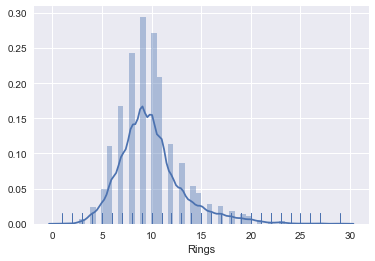

In [6]:
"""
We will plot univariate distribution for attribute Rings
seaborn have distplot() for plotting univariate distributions
Parameters : hist for plotting histogram.
           : kde for plotting curve for kernel density estimation.
           : rug for plotting ticks for observation values.
"""
sns.distplot(abalone_df["Rings"], hist=True, kde=True, rug=True)

<a name="part-three-two---bivariate-distribution"></a>    
## Bivariate  distribution

Bivariate distributions are used to represent bivariate (or joint) relationships between two variables. Function provided by the seaborn for performing such a operation is jointplot. Tweaking arguments of the jointplot one can either plot scatterplot, hexbinplot, or kdeplot. Also there are a lot of other features which one can tweak as an argument to jointplot, but we will use only a few for our purpose.

<a name="part-three-two-one---scatterplot"></a>    
### scatterplot

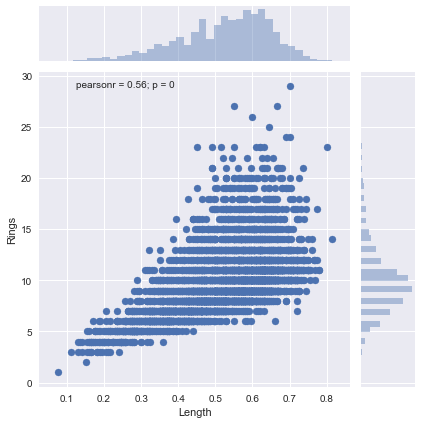

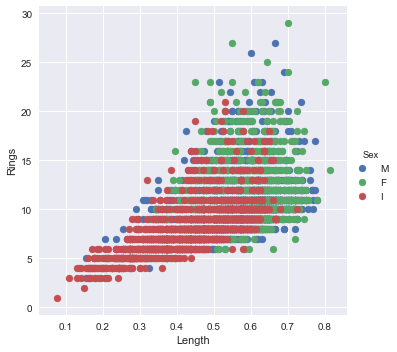

In [7]:
"""
similar to rugplot for univariate distribution
Figure 1: "Length" on x axis and "Rings" on y axis.
           Each observation in the dataset in represented by a dot in the graph.
"""
#Figure 1
sns.jointplot(x="Length", y="Rings", data=abalone_df)
"""
Figure 1 plots a dot for each observation, but one can use Facet to further introduce one
more variable in the plot. We will discuss Facet in detail further in the notebook.
"""
#Figure 2
g = sns.FacetGrid(abalone_df, hue="Sex", size=5)
g.map(plt.scatter, "Length", "Rings")
g.add_legend()

<a name="part-three-two-two---hexbinplot"></a>      
### hexbinplot

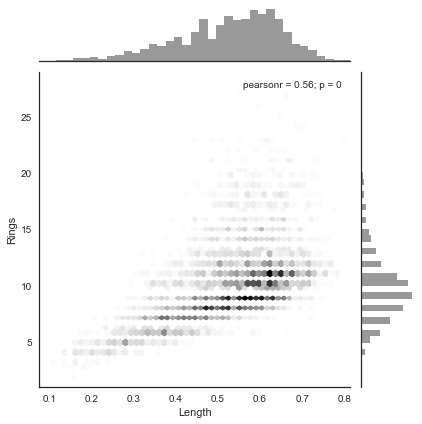

In [8]:
"""
Similar to histplot for univaraite distribution
We will plot bivariate distribution for Rings on x axis vs Length on y axis
In this plot each hexagonal represents one bin and color intensity represents
the number of observations in that bin.
Also this plot looks nice with white background
"""
with sns.axes_style("white"):
    sns.jointplot(x="Length", y="Rings", kind="hex", color="k", data=abalone_df)

<a name="part-three-two-three---kdeplot"></a>            
### kdeplot

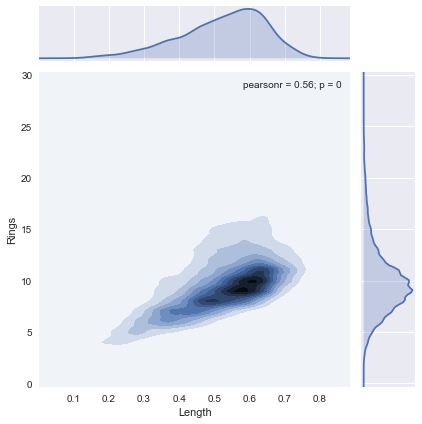

In [9]:
"""
Similar to kdeplot for univariate distribution
We will plot bivaraite distribution for Length on x axis vs Rings on y axis
In this plot each the distribution is represented in forms of contours.
"""
sns.jointplot(x="Length", y="Rings", kind="kde", data=abalone_df)

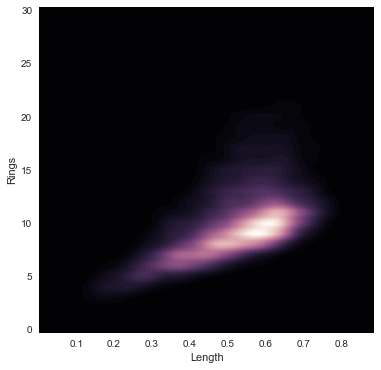

In [10]:
#One can also get bivaraite density more continiously, by increasing the number of contour levels
f, ax = plt.subplots(figsize=(6,6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(abalone_df["Length"], abalone_df["Rings"],  cmap=cmap, n_levels=60, shade=True)

<a name="part-three-three---pairwise-distribution"></a>      
## Pairwise distribution

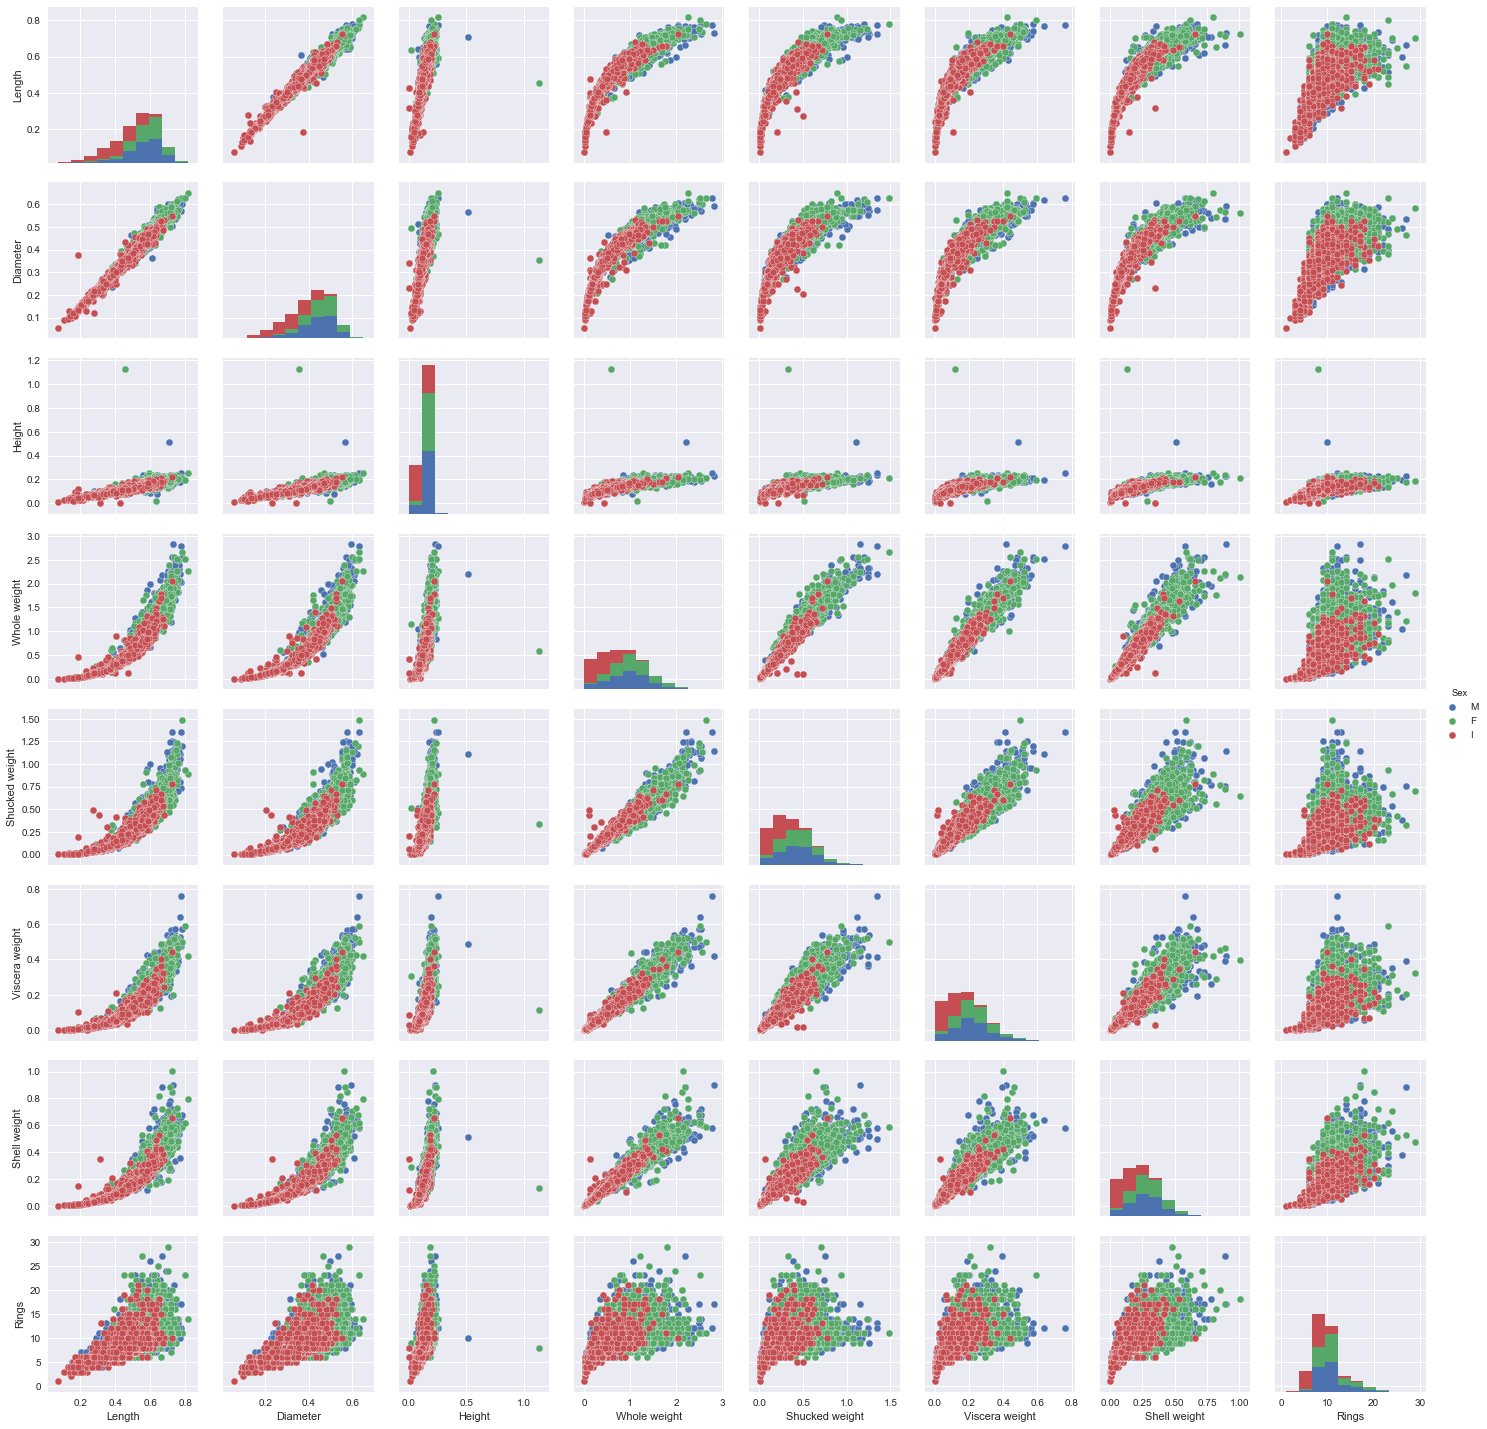

In [11]:
"""
PairPlots is used to visualize pairwise bivariate distributions of dataset.
Seaborn is smart enough to leave Sex field for plotting as it is String type
"""
sns.pairplot(abalone_df, hue="Sex")

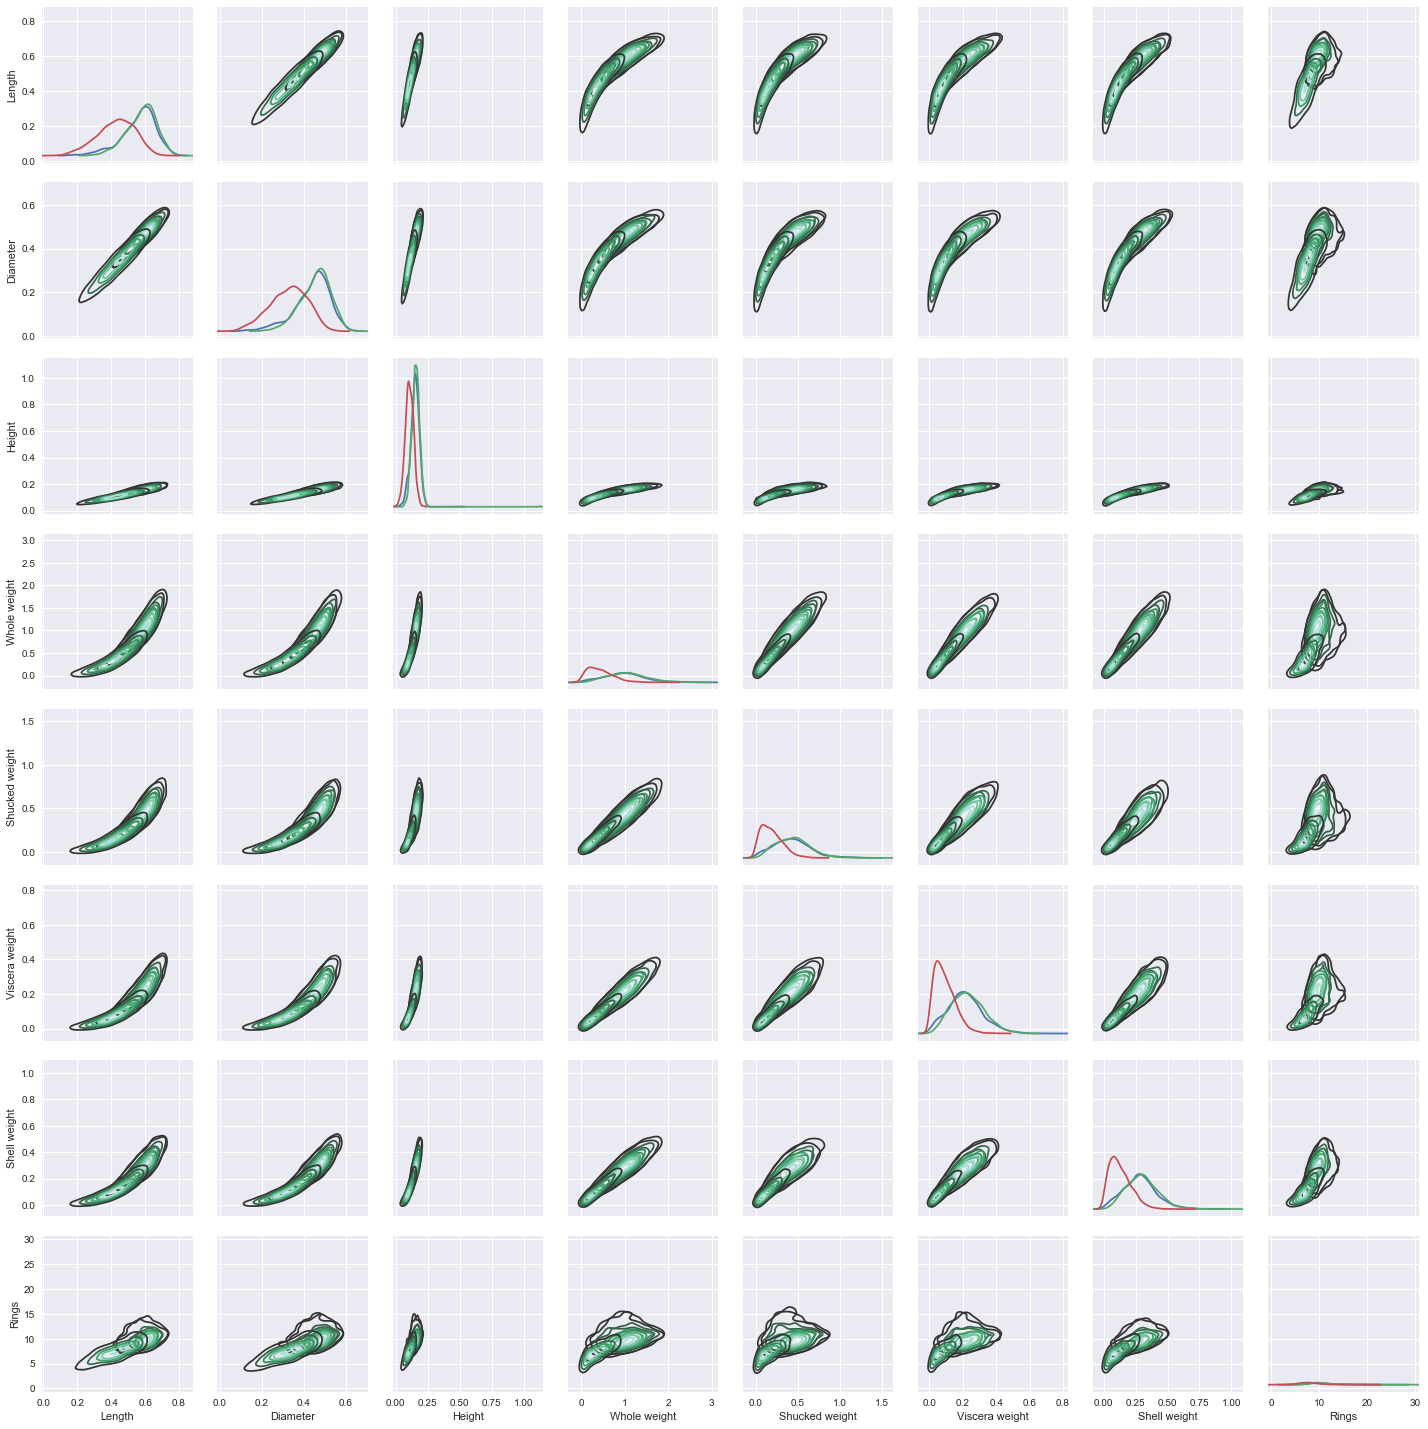

In [12]:
"""
pairplot returns an object of type PairGrid, one can directly use PairGrid in order to have
more flexibility in plotting
""" 
g = sns.PairGrid(abalone_df, hue="Sex")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

<a name="part-four---plotting-regression-models"></a>    
# Part Four: Plotting regression models

<a name="instruction-4"></a>
## Instructions

First question I asked myself when I interacted with seaborn's linear regression plotting functions was : "Is it a subsitute of my pain? Because: Usually when I performed linear regression, I usually used numpy or other libraries to perform the stats and then use matplotlib to plot graphs. But seaborn can even fit models directly. Hell ya there is no need to learn all that concepts of linear regression in deep then!!!" Well the answer is no, because seaborn can not do everything complicated you can with stats libraries, well isn't it correct? Well seaborn provides some functions on your hand which you can use quickly to fit models on your dataset. Well I haven't exhaustively tested all the functions of seaborn but here lets use it for some quick model fitting on our dataset. Later in this notebook we will use numpy for helping us to fit model on data.

<a name="part-four-one---one-input-variable-vs-target-variable"></a>  
## One input variable vs target variable

seaborn have two functions for plotting regression regplot and implot. Although both these functions look quite similar in the first look, but there are quite a subtle differences between those two. For detailed differences please follow seaborn's documentation. seaborn can fit five different kind of regression models on dataset.
* Linear regression
* Polynomial regression
* Robust regression
* Logistic regression
* Non parameteric regression (Local regression)

<a name="part-four-one-one---linear-regression"></a>    
### Linear Regression

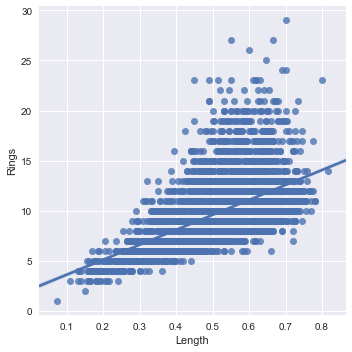

In [13]:
"""
We are using lmplot to fit a simple linear regression when keeping "Length" at x axis and 
"Rings" on y axis. lmplot first plots a scatter plot which we showed in the section of bivariate
analysis and show a dot for each observation in the dataset. Finally fits a line (linear regression)
on the dataset.
"""
sns.lmplot(x="Length", y="Rings", data=abalone_df)

<a name="part-four-one-two---polynomial-regression"></a>      
### Polynomial Regression

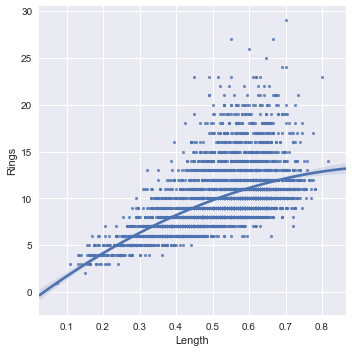

In [14]:
"""
Well lets try to fit a more complex model than simple linear regression, i.e. a model of order 2
on our dataset.
"""
sns.lmplot(x="Length", y="Rings", data=abalone_df, order=2, scatter_kws={"s": 10})

<a name="part-four-one-three---robust-regression"></a>      
### Robust Regression

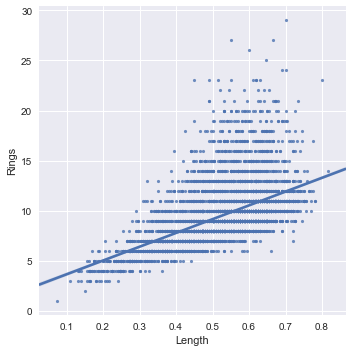

In [15]:
"""
Although the above fit looks nice but there are some outliers in the dataset as can be seen
near right top corners. In order to penalize such outliers we can use robust regression fit of
seaborn
"""
sns.lmplot(x="Length", y="Rings", data=abalone_df, robust=True, scatter_kws={"s": 10})

<a name="part-four-one-four---logistic-regression"></a>      
### Logistic Regression

<a name="part-four-two---two-input-variable-vs-target-variable"></a>      
## Two input variable vs target variable

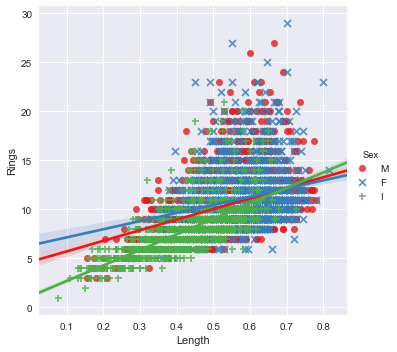

In [16]:
"""
First lets plot the relationship between three varaibles i.e. "Length", "Ring", and "Sex"
"""
sns.lmplot(x="Length", y="Rings", hue="Sex", data=abalone_df, markers=["o","x","+"], palette="Set1")

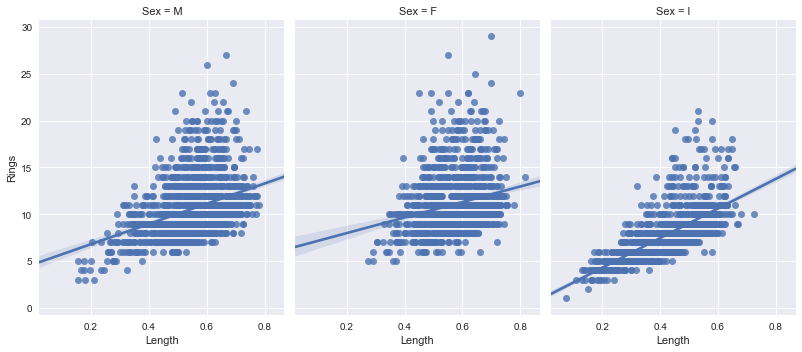

In [17]:
"""
Second lets plot the same relationship between three between variables i.e. "Length", "Rings", 
and "Sex". Not on a single Facet but on different Facets for each of Sex.
"""
sns.lmplot(x="Length", y="Rings", col="Sex", data=abalone_df, aspect=0.75)

<a name="part-four-three---residplot"></a>    
## residplot: Tool for checking plotting residual

seaborn has made available quite useful to have a quick look inside the dataset if linear regression is really a good fit as a model for the dataset. This function firsts fits a simple linear regression and then plots the residuals (difference between actual values and predicted values according to the fit) around y = 0. If output of such a plots shows some patterns for sure linear regression model is not complex enough to model the relationship existing in the dataset.

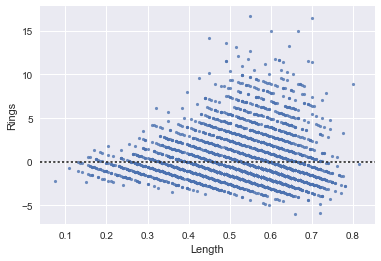

In [18]:
"""
As can be seen from the below plot that the residuals are not random, infact there exists a
pattern in the below plot. And the pattern is that as the length increases more Rings also 
increases but after some after Length 0.6 rings start to fall. Hence can be predicted that 
linear regression wont be complex enough to fit the dataset.
"""
sns.residplot(x="Length", y="Rings", data=abalone_df, scatter_kws={"s": 10})

# Part Five: Plotting with Categorical data
<a name="part-five-one---each-observation-for-corresponding-categorical-variable"></a>

<a name="instruction-5"></a>
# Instructions

Although we already saw how to plot relationship between two variables, and how it changed corresponding to a third variable which is categorical. For example in Step 5.2 we saw how to plot "Length" vs "Rings" with respect to "Sex" as a third variable which was a categorical variable. In this step we will see how we can use seaborn to plot when our categorical variable is actually one of the main variables i.e. on one of two axis. Seaborn have divided such plotting functions into three classes:
* One which shows each observation for corresponding categorical variable.
* One that shows abstract representation of observations.
* One used for statistical estimation to show a  measure of central tendency.

<a name="part-five-one---each-observation-for-corresponding-categorical-variable"></a>
## Each observation for corresponding categorical variable

seaborn have two functions in this class namely.
* stripplot : This plot can be considered as a simple scatterplot when one of the variable is categorical variable.
* swarmplot : Similar to stripplot but uses special algorithm so that no two observations overlap each other in plot.

<a name="part-five-one-one---stirplot"></a>  
### stirplot

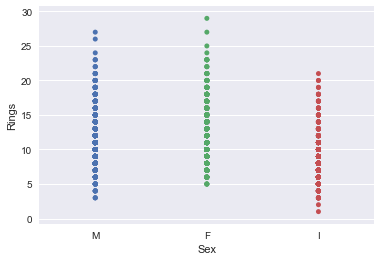

In [19]:
"""
Each observation in our dataset have a single unique value for "Sex" variable. stripplot uses
this value for the categorical variable and plot each of the observation against its corresponding
class for categorical variable.
"""
sns.stripplot(x="Sex", y="Rings", data=abalone_df)

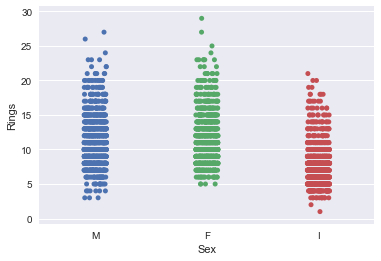

In [20]:
"""
As can be seen that stripplot may cause two or more observations to overlap each other depending
on their value of "Rings" for a single class of "Sex", we can use jitter so that the observations
are plotted using some jitter.
"""
sns.stripplot(x="Sex", y="Rings", jitter=True, data=abalone_df)

<a name="part-five-one-two---swarmplot"></a>    
### swarmplot

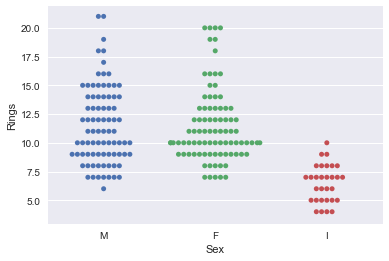

In [21]:
"""
Although once we used jitter observations can be seen apart, But still there is overlap, 
because although seaborn introduces jitter for observations, it does not gurantee no two 
observations for same value of y axis "Rings" will not have same jitter. Hence we can use 
swarmplot to make sure no two observations collide with each other. Since swarmplot uses 
a special algorithm inorder to make sure that no two observations will collide, but that 
depends upon the number of observations in the dataset and also on size of the plot. Also
since swarmplot is more computation intensive than stripplot we will plot just some subset
i.e. starting 200 rows of the dataset.
"""
sns.swarmplot(x="Sex", y="Rings", data=abalone_df.head(200))

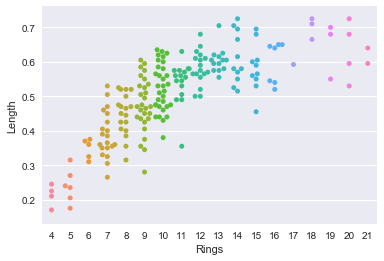

In [22]:
"""
seaborn tries to infer type of variable directly form the input. For example if any column in 
the pandas dataframe have categorical datatype, then seaborn can use the default order from
the categories set there. And in case if string datatype seaborn takes in same order they 
appear in the data and in case of numerical datatype seaborn plots it in the sorted order.
Below case shows when "Rings" which is of numeric datatype when used to plot as an categorical
variable seaborn first sorts and then plot. Again we just plot a subset of dataset i.e. 200 
observations.
"""
sns.swarmplot(x="Rings", y="Length", data=abalone_df.head(200))

<a name="part-five-two---distributions-of-observations-within-categories"></a>    
## Distrbutions of observations within categories

seaborn have two functions for the same.
* boxplot : This plot calculates three "quartile" values of the distribution, i.e Q1, Q2, Q3 and two "whiskers".
* violinplot : A combination of boxplot and kde.

<a name="part-five-two-one---boxplot"></a>  
### boxplot

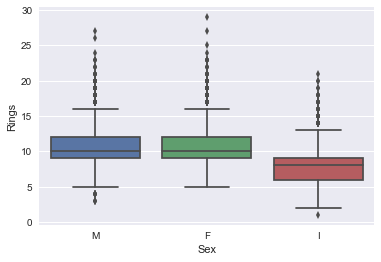

In [23]:
"""
For boxplot seaborn calculates three "quartile" values of the distribution i.e. Q2 median  of 
all observations, Q1 median of observations between Q2 and on its left, Q3 median of observations
between Q2 and on its right. "whiskers" lines perpendicular to the box represent all the 
observations in 1.5IQRs. ??. Also dots in the bottom and top may be representing the outliers?
"""
sns.boxplot(x="Sex", y="Rings", data=abalone_df)

<a name="part-five-two-two---violinplot"></a>    
### violinplot

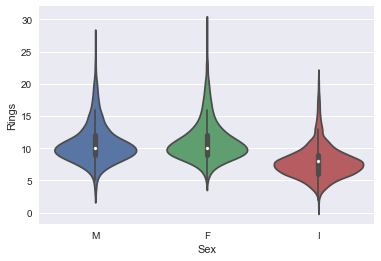

In [24]:
"""
violin plot can be thought of a combination of box plot and kde. It shows all the information
shown in the boxplot, like Q1, Q2 and Q3 where Q2 is white dot in between, Q1 and Q3 are the 
end of the thick line in between. Also two whiskers are represented by thin line inside the
violins. And tips are representing that how skew (outliers) are residing in the dataset.
"""
sns.violinplot(x="Sex", y="Rings", data=abalone_df)

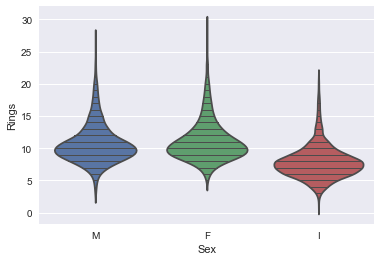

In [25]:
sns.violinplot(x="Sex", y="Rings", data=abalone_df, inner="stick")

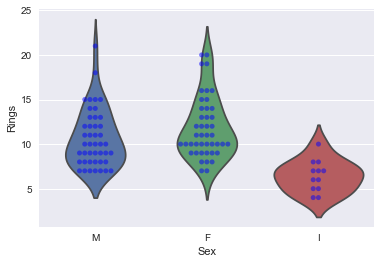

In [26]:
sns.violinplot(x="Sex", y="Rings", data=abalone_df.head(100), inner=None)
sns.swarmplot(x="Sex", y="Rings", data=abalone_df.head(100), color="b", alpha=.5)

<a name="part-five-three---statstical-estimation-within-categories"></a>    
## Stastical estimation within categories

seaborn have three functions in this class, to show the central tendency of values.
* barplot.
* countplot.
* pointplot.

<a name="part-five-three-one---barplot"></a>  
### barplot

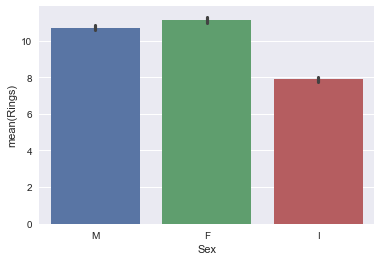

In [27]:
"""
Barplot by default represents the central tendency of the values and which by default is the
mean of the observations. the lines shown on the top of the bar is the estimate of the errors.
"""
sns.barplot(x="Sex", y="Rings", data=abalone_df)

<a name="part-five-three-two---countplot"></a>    
### countplot

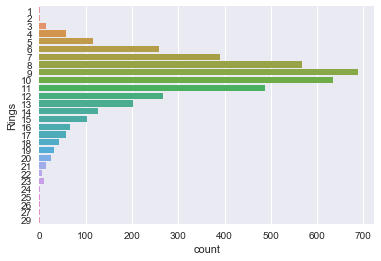

In [28]:
"""
Below plot shows the number of observations in each class of "Rings"
"""
sns.countplot(y="Rings", data=abalone_df)

<a name="part-five-three-three---pointplot"></a>    
### pointplot

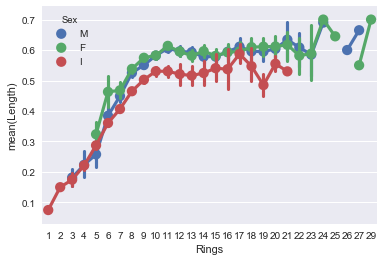

In [29]:
"""
Human eyes are very good at noticing the difference in slopes of different lines. The below
graphs shows the how mean of the "Length" varies for increasing the number of "Rings" for each
"Sex". Vertical lines at dots are showing the error in the mean. It can be easily visualized
that the slope of the line increases for increasing Rings.
"""
sns.pointplot(x="Rings", y="Length", hue="Sex", data=abalone_df)

<a name="part-five-four---multi-panel-categorical-plot"></a>    
## Multi-panel categorical plot

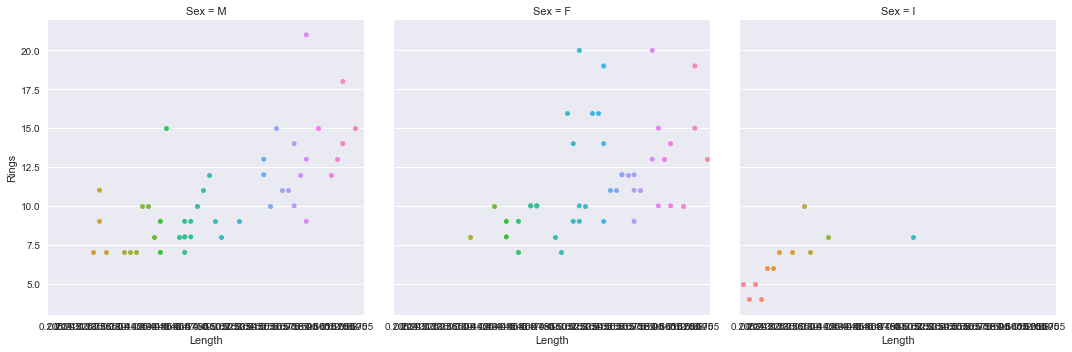

In [30]:
"""
factorplot is a higher level function which can combine all the 6 plots shown above i.e. 
stripplot, swarmplot, boxplot, violinplot, barplot, pointplot along with a 
FacetGrid. By default factorplot produces a pairplot. Therefore one can create a PairGrid
and can map it using any of the above 6 functions. Also remember that for using controling
the size and shape of plots on PairGrid one shall use argumets such as size and aspect.
"""
sns.factorplot(x="Length", y="Rings", col="Sex", data=abalone_df.head(100), size=5, kind="strip")

<a name="summary"></a>  
# Summary

Detailed summary of all the functions to be added here.